***Created by Antoine Courbi***

# Timer Log

## Implement decorator

Ok so first what is a decorator :
```bash
...add new functionality to an existing object without modifying its structure
```
*from [here](https://www.datacamp.com/tutorial/decorators-python)*
```bash
...a function that takes another function and extends the behavior of the latter function without explicitly modifying it
```
*from [here](https://realpython.com/primer-on-python-decorators/)*

Now that we now everything about `decorators`, lets build one!  
We want our `decorator` to log the **execution time** of a function.  
So we are going to create a function named `timing_decorator` that will take a function as argument and return a function.  
The function returned would be named `wrapper` and will take the same arguments as the function passed to the `decorator`.

In [40]:
import time

def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"{func.__name__} took {execution_time:.6f} seconds to execute.")
        # now we return the execution time
        return execution_time 
    return wrapper

## Counting functions

Now that we have our decorator, we want to create two functions that count the number of appearances of each word in a text.  
The first one will be using a dictionary and the second one will be using a `Counter` object from the `collections` module.

In [41]:
@timing_decorator
def count_words_with_dict(filename):
    word_count = {}
    with open(filename, 'r') as file:
        for line in file:
            words = line.split()
            for word in words:
                word_count[word] = word_count.get(word, 0) + 1
    return word_count

In [42]:
from collections import Counter

@timing_decorator
def count_words_with_counter(filename):
    word_count = Counter()
    with open(filename, 'r') as file:
        for line in file:
            words = line.split()
            word_count.update(words)
    return word_count

Now we can try them out and see which one is the fastest.

In [58]:
# we first get the data from the file
shakespeare_file = 'data/t8.shakespeare.txt'

# and we can call the functions to get the results and execution time
result_dict = count_words_with_dict(shakespeare_file)
result_counter = count_words_with_counter(shakespeare_file)

count_words_with_dict took 1.462050 seconds to execute.
count_words_with_counter took 2.503820 seconds to execute.


Results were :
```bash
count_words_with_dict took 1.462050 seconds to execute.
count_words_with_counter took 2.503820 seconds to execute.
```
As we can see using a dictionary is faster than using a `Counter` object.  
Looking on internet I found a nice topic([here](https://stackoverflow.com/questions/43956930/why-does-a-dictionary-count-in-some-cases-faster-than-collections-counter)) in which we can read the following :
```bash
[speaking about Counter]...So it isn't really surprising if other approaches are faster for short iterables. However for long iterables the check doesn't matter much and Counter should be faster
```
So we can assume that due to the small size of our text, the `Counter` object is slower than a dictionary.

## Increase Iterations

Now we will peerform the same thing but 100 times.

In [54]:
execution_times_dict = []
execution_times_counter = []
number_iterations = 100

for _ in range(number_iterations):
    print(f"Running iteration {_}/{number_iterations}")
    execution_time_dict = count_words_with_dict(shakespeare_file)
    execution_times_dict.append(execution_time_dict)

    execution_time_counter = count_words_with_counter(shakespeare_file)
    execution_times_counter.append(execution_time_counter)

Running iteration 0/100
count_words_with_dict took 1.692986 seconds to execute.
count_words_with_counter took 1.662615 seconds to execute.
Running iteration 1/100
count_words_with_dict took 1.267677 seconds to execute.
count_words_with_counter took 1.808972 seconds to execute.
Running iteration 2/100
count_words_with_dict took 1.865700 seconds to execute.
count_words_with_counter took 1.506744 seconds to execute.
Running iteration 3/100
count_words_with_dict took 1.855532 seconds to execute.
count_words_with_counter took 1.942700 seconds to execute.
Running iteration 4/100
count_words_with_dict took 1.265749 seconds to execute.
count_words_with_counter took 1.487530 seconds to execute.
Running iteration 5/100
count_words_with_dict took 1.805315 seconds to execute.
count_words_with_counter took 2.291260 seconds to execute.
Running iteration 6/100
count_words_with_dict took 1.708843 seconds to execute.
count_words_with_counter took 1.975069 seconds to execute.
Running iteration 7/100
cou

The results are stocked, we can now see the two distributions of execution times.

C:\Users\antoi\AppData\Local\Temp\ipykernel_29856\532379273.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(execution_times_dict, shade=True, label="Using Dictionary")


C:\Users\antoi\AppData\Local\Temp\ipykernel_29856\532379273.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(execution_times_counter, shade=True, label="Using Counter")


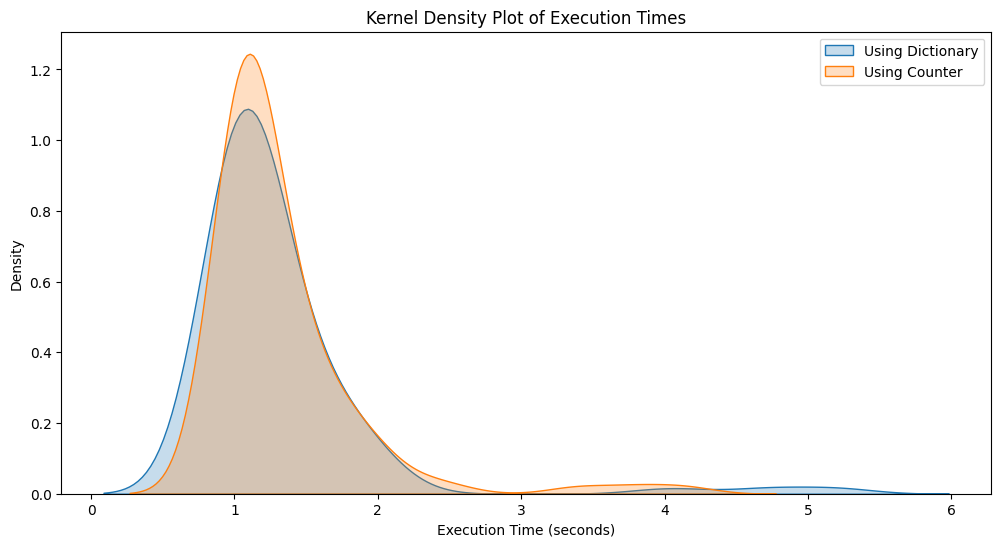

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot both lines on the same graph
plt.figure(figsize=(12, 6))
sns.kdeplot(execution_times_dict, shade=True, label="Using Dictionary")
sns.kdeplot(execution_times_counter, shade=True, label="Using Counter")
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Execution Times")
plt.legend()
plt.show()


Lets perform some statistics on the results as well

In [59]:
import numpy as np

mean_dict = np.mean(execution_times_dict)
variance_dict = np.var(execution_times_dict)

mean_counter = np.mean(execution_times_counter)
variance_counter = np.var(execution_times_counter)

print(f"Using Dictionary: Mean = {mean_dict:.6f}, Variance = {variance_dict:.6f}")
print(f"Using Counter: Mean = {mean_counter:.6f}, Variance = {variance_counter:.6f}")

Using Dictionary: Mean = 1.303031, Variance = 0.432673
Using Counter: Mean = 1.327084, Variance = 0.285475


Ok so looking at the graph distributino of execution times, we can see that when increasing the number of iterations, its Counter that does a btter job, becuse the peak distribution density is higher than for the dictionnary, the distribution is less spread out.  
Also when looking at the statistics :
```bash
Using Dictionary: Mean = 1.303031, Variance = 0.432673
Using Counter: Mean = 1.327084, Variance = 0.285475
```
we can see that using dictionnary helps to have a better mean value (1.3 against 1.327) but the variance is higher (0.432 against 0.285) which means that the distribution is more spread out and again, depending on the use case, we might prefer to have a better variance (btter accuracy) or a better mean (better precision).